# Trabajo modelado matematico 2 

## Jesús Miguel Sepúlveda Suárez

In [169]:
## Librerias que vamos a usar
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

In [170]:
def funcline(params,x):
    return params[0]*x+params[1]


def Errorlineal(tpl,x,y):
    return funcline(tpl,x)-y


def graficalineal(x,y):
    p0 = [0,0]
    bestt,suss = leastsq(Errorlineal, p0, args=(x,y))
    y2 = funcline(bestt,x)
    plt.plot(x,y, "or")
    plt.plot(x,y2, ":k")
    print(bestt[0], bestt[1])

In [171]:
# Se hace la funcion de la recta y se le suma ruido de una distribución normal
m = 2
b = 0.1
x = np.arange(0,10,1)
np.random.seed(1)
error = np.random.randint(1,10,10)
ruido = np.random.normal(0,1,10)
y = m*x+b
y_ruido = m*x+b + ruido

<ErrorbarContainer object of 3 artists>

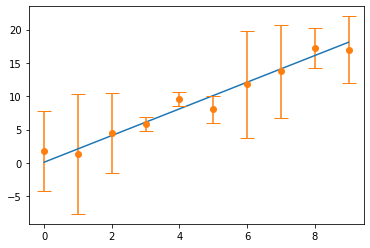

In [204]:
# Se grafica la recta con sus barras de ruido
plt.plot(x,y)
plt.errorbar(x,y_ruido, error,capsize=7, fmt='o')
# plt.plot(x,ruido,'r--')

1.8812463680832587 0.6126560864239234


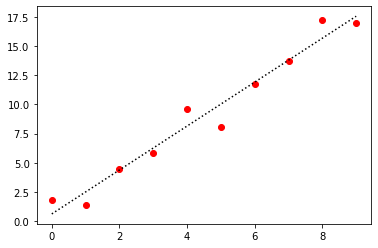

In [173]:
# Se grafica la mejor recta con el ruido de la distribucion normal por minimos cuadrados
graficalineal(x,y_ruido)

## Exploracion de parametros con pasos de 0.5

In [206]:
# Se hace exploracion de parametros a fuerza bruta para obtener el menor chi2 y saber que recta es la mejor
b_list = np.arange(-5,7,0.5)
m_list = np.arange(-0.5,5,0.5)

chi2 = np.zeros((b_list.size,m_list.size))

for i in range(b_list.size):
    for j in range(m_list.size):
        
        y_model = m_list[j]*x + b_list[i]
        
        chi2[i,j] = (((y_model-y_ruido)/error)**2).sum() 
        

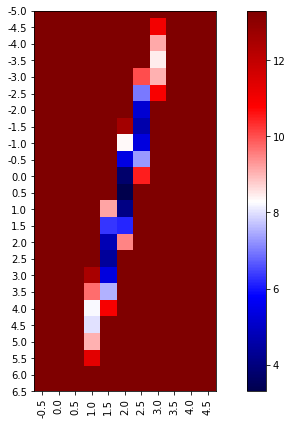

In [207]:
plt.figure(figsize=(11,7))
plt.imshow(chi2, vmax=13.3, cmap='seismic')
plt.xticks(ticks=np.arange(0,11,1),labels=m_list,rotation=90)
plt.yticks(ticks=np.arange(0,24,1),labels=b_list)
plt.colorbar()

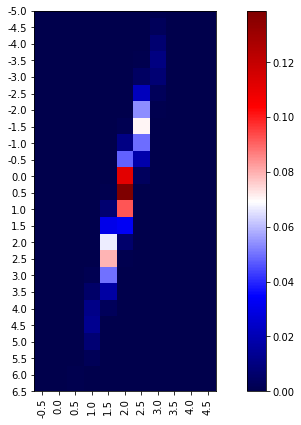

In [208]:
like = np.exp(-chi2/2)
pt = like.sum()
like = like/pt
plt.figure(figsize=(11,7))
plt.imshow(like, cmap='seismic')
plt.xticks(ticks=np.arange(0,11,1),labels=m_list,rotation=90)
plt.yticks(ticks=np.arange(0,24,1),labels=b_list)
plt.colorbar()

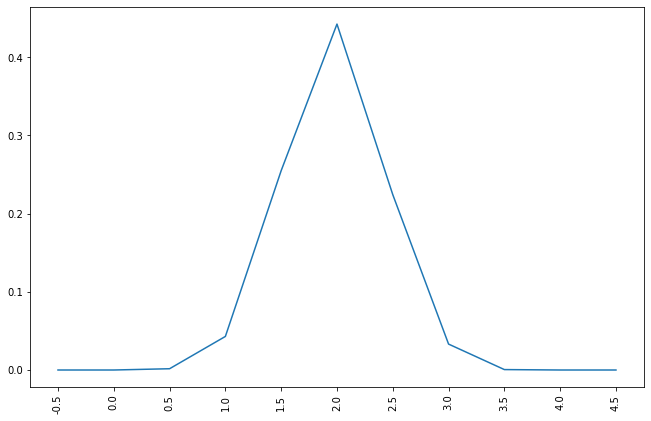

In [209]:
# se grafica la probabilidad del eje x "La media"
prob_m = like.sum(axis=0)
plt.figure(figsize=(11,7))
plt.xticks(ticks=np.arange(0,11,1),labels=m_list,rotation=90)
plt.plot(prob_m)

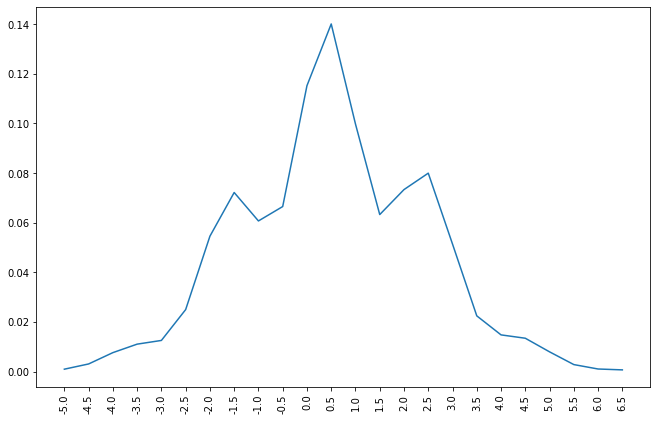

In [210]:
# Se grafica la probabilidad del eje y "La constante b"
prob_b = like.sum(axis=1)
plt.figure(figsize=(11,7))
plt.xticks(ticks=np.arange(0,24,1),labels=b_list,rotation=90)
plt.plot(prob_b)

## Evaluar el chi2 con pasos mas pequeños "0.1"

## Se hace una aproximacion de los limites para oberservar mejor los valores del centro

In [211]:
b_list = np.arange(0,1.1,0.1)
m_list = np.arange(1.5,2.6,0.1)

chi2 = np.zeros((b_list.size,m_list.size))

for i in range(b_list.size):
    for j in range(m_list.size):
        
        y_model = m_list[j]*x + b_list[i]
        
        chi2[i,j] = (((y_model-y_ruido)/error)**2).sum() 

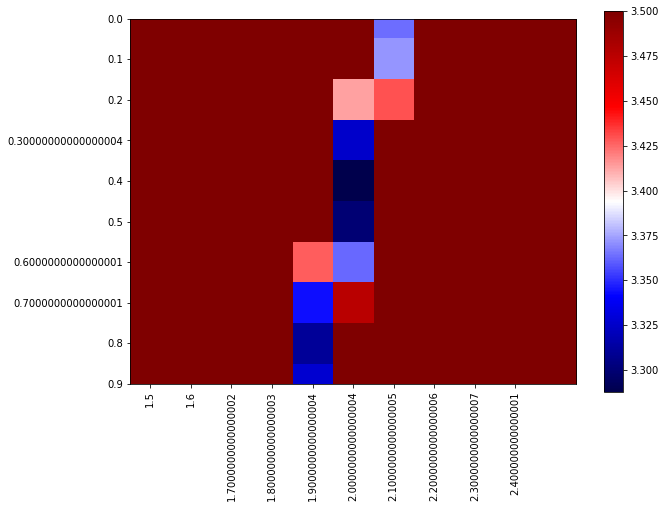

In [212]:
plt.figure(figsize=(10,7))
plt.imshow(chi2, vmax=3.5, cmap='seismic')
plt.xticks(ticks=np.arange(0,10,1),labels=m_list,rotation=90)
plt.yticks(ticks=np.arange(0,10,1),labels=b_list)
plt.colorbar()

## Se toman pasos mas pequeños sin aproximar los limites

In [213]:
b_list = np.arange(-5.5,6.5,0.1)
m_list = np.arange(0.3,3.7,0.1)

chi2 = np.zeros((b_list.size,m_list.size))

for i in range(b_list.size):
    for j in range(m_list.size):
        
        y_model = m_list[j]*x + b_list[i]
        
        chi2[i,j] = (((y_model-y_ruido)/error)**2).sum() 

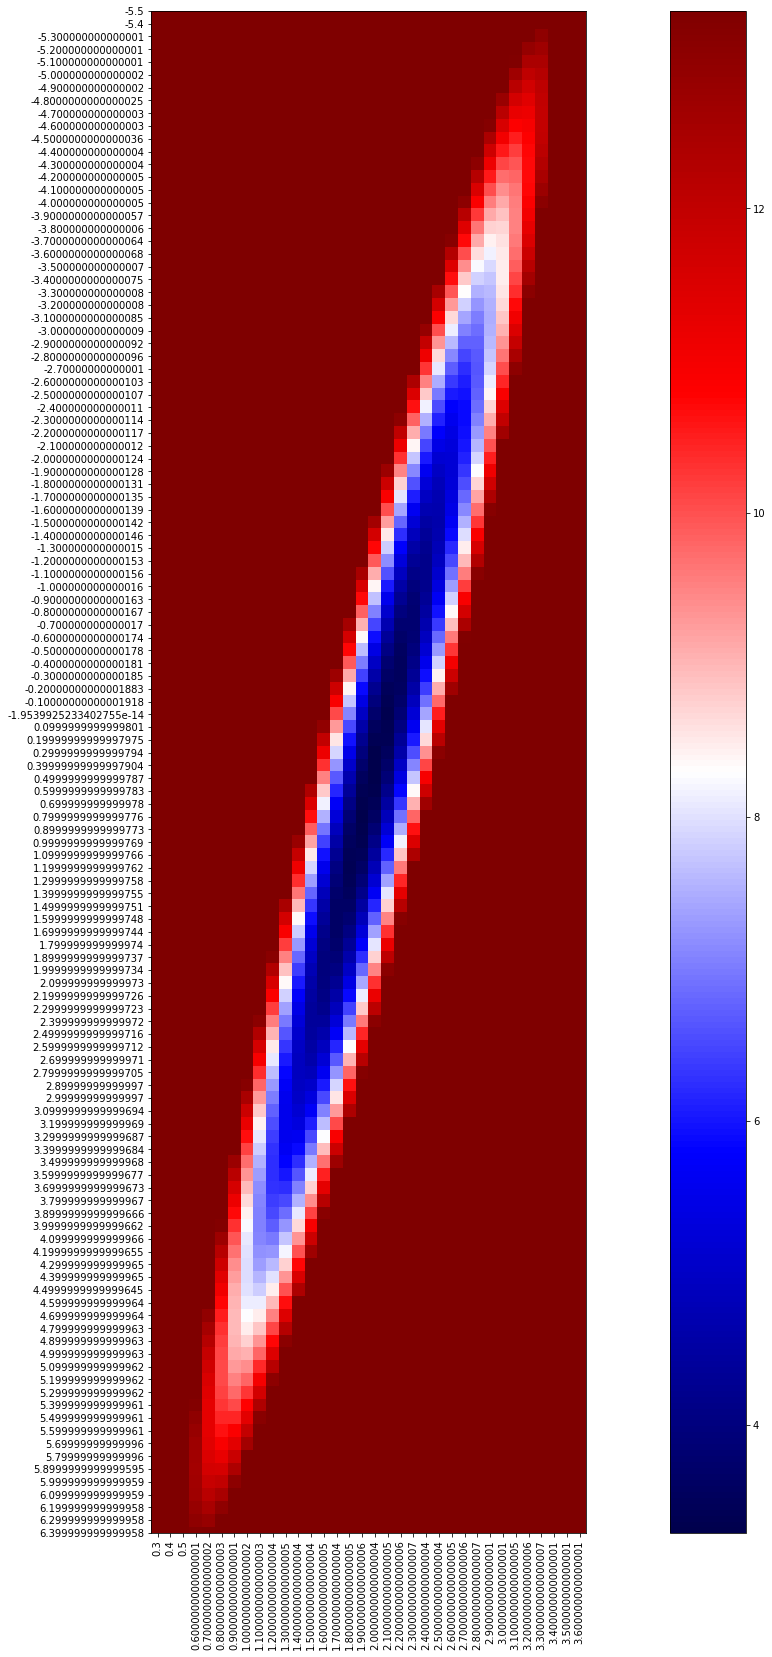

In [214]:
plt.figure(figsize=(30,28))
plt.imshow(chi2, vmax=13.3, cmap='seismic')
plt.xticks(ticks=np.arange(0,34,1),labels=m_list,rotation=90)
plt.yticks(ticks=np.arange(0,120,1),labels=b_list)
plt.colorbar()

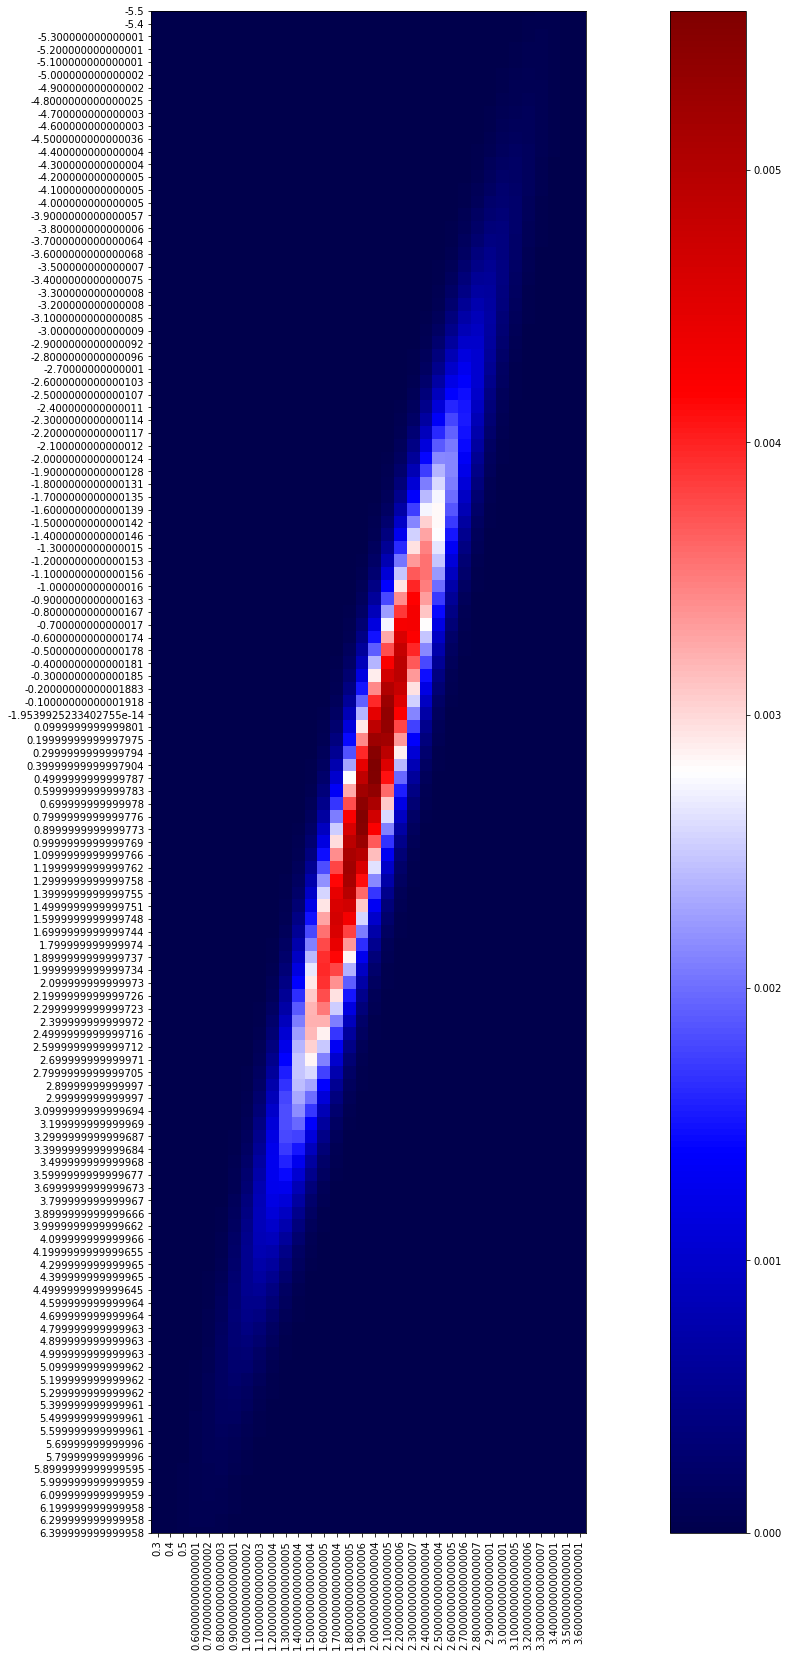

In [215]:
like = np.exp(-chi2/2)
pt = like.sum()
like = like/pt
plt.figure(figsize=(30,28))
plt.imshow(like, cmap='seismic')
plt.xticks(ticks=np.arange(0,34,1),labels=m_list,rotation=90)
plt.yticks(ticks=np.arange(0,120,1),labels=b_list)
plt.colorbar()

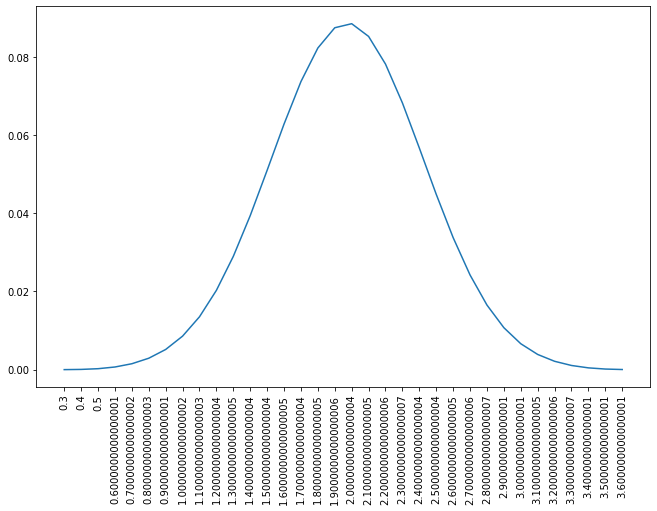

In [147]:
prob_m = like.sum(axis=0)
plt.figure(figsize=(11,7))
plt.xticks(ticks=np.arange(0,34,1),labels=m_list,rotation=90)
plt.plot(prob_m)

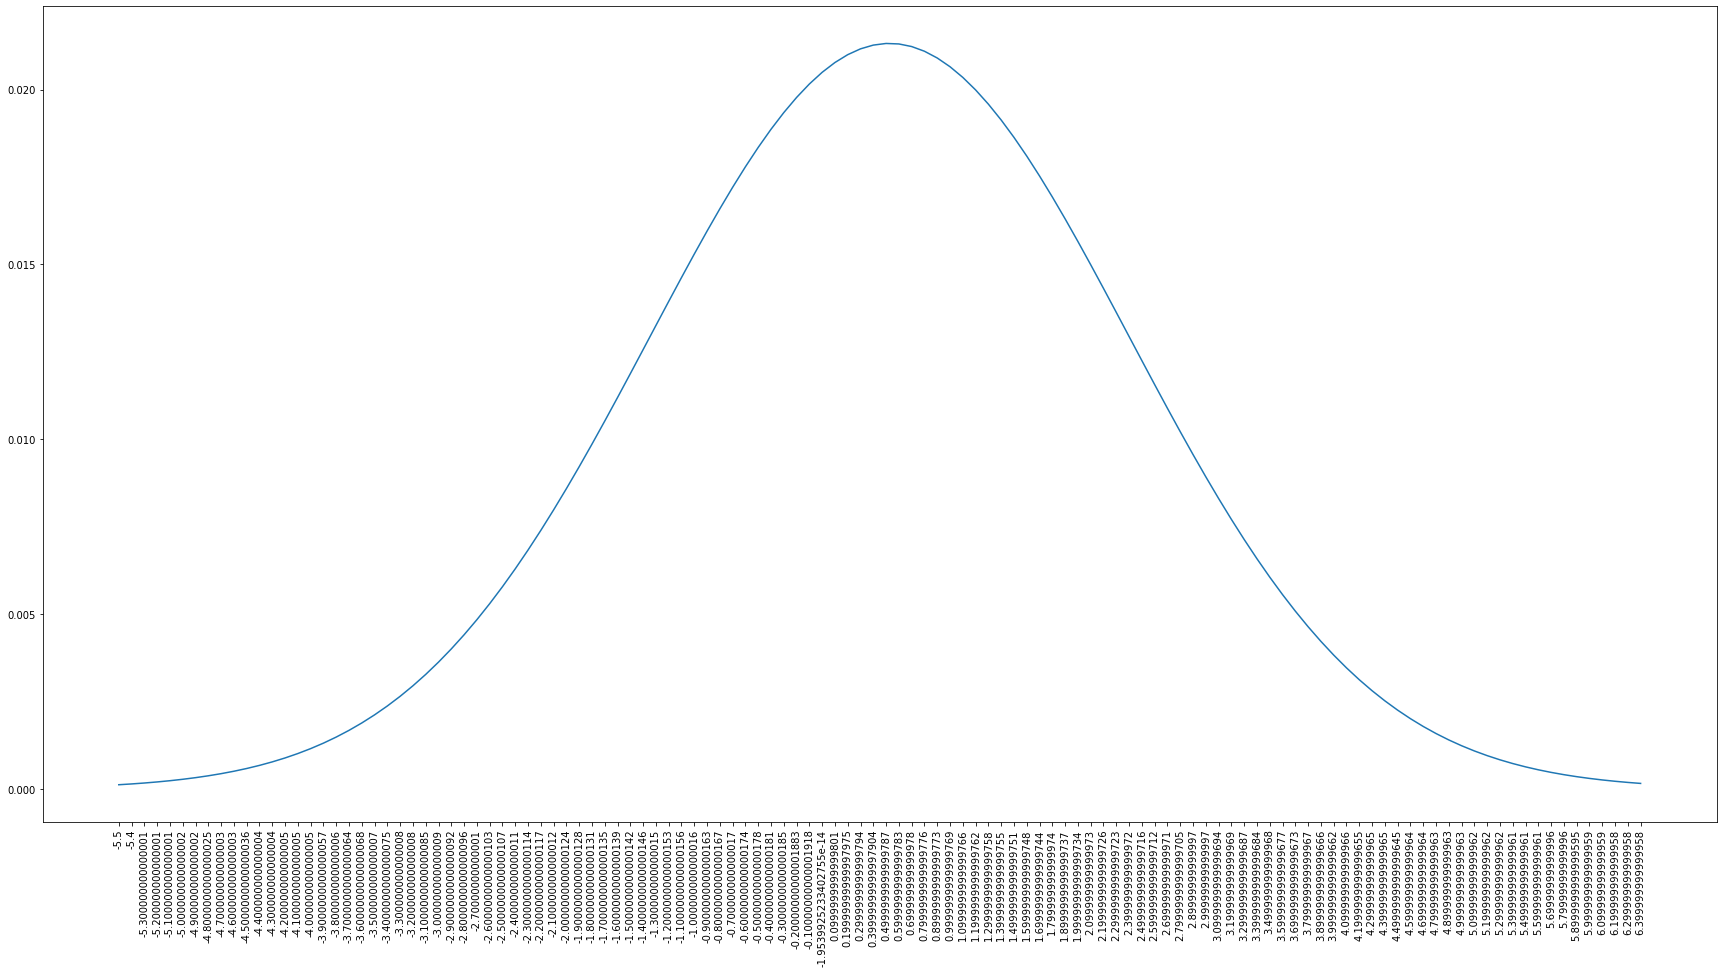

In [162]:
prob_b = like.sum(axis=1)
plt.figure(figsize=(30,15))
plt.xticks(ticks=np.arange(0,120,1),labels=b_list,rotation=90)
plt.plot(prob_b)

In [166]:
np.min(chi2)

3.287999445370395

In [167]:
m_list[17]

2.0000000000000004

In [168]:
b_list[59]

0.39999999999997904

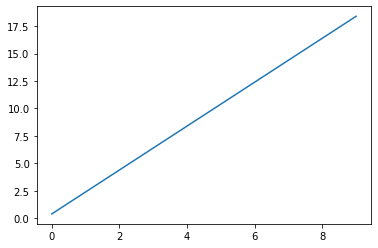

In [217]:
x = np.arange(0,10,1)
y = m_list[17]*x + b_list[59]
plt.plot(x,y)